# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [36]:
#importing packages and data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as st
df = pd.read_csv("human_body_temperature.csv")

In [37]:
#quickly viewing the dataset

print(df.head(10))
temp = df['temperature']

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
5         99.2      M        83.0
6         98.0      M        71.0
7         98.8      M        78.0
8         98.4      F        84.0
9         98.6      F        86.0


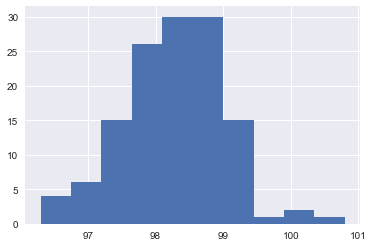

In [38]:
#checking the distribution for the data

sns.set()
plt.hist(temp)
plt.show()

In [39]:
#using the function used in the tutorials to compute the ECDF of the data 
#and plotting this also to a histograph to view the data.
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_temp, y_temp = ecdf(temp)

In [40]:
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

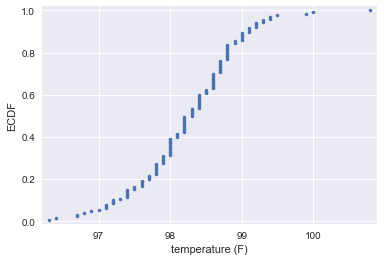

In [41]:
plt.margins(0.02)
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('ECDF')
plt.show()
#visualising the ecdf

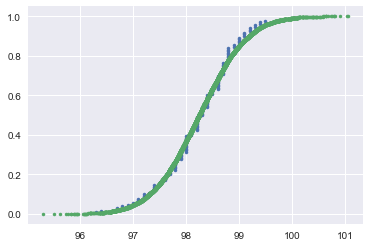

In [42]:
mean = np.mean(temp)
std = np.std(temp)
samples = np.random.normal(mean, std, size=10000)
x_samp, y_samp = ecdf(samples)

_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.plot(x_samp, y_samp, marker='.', linestyle='none')

plt.show()


#you can see that there is a normal distribution and the samples match the ecdf of the original data.

In [43]:
print(mean)
sample_mean = np.mean(samples)
print(sample_mean)

#Is the sample size large? Are the observations independent?
#the mean of the samples is roughly equal to that of the original observations, 
#also, the samples have a normal distribution pattern being approximately equal to the original dataset,
#showing that the sample size is sufficiently large. 
#The observations are independent, they don't affect each other.
mean = np.mean(df.temperature)
std = np.std(df.temperature)

z_score = (98.25 - mean) * len(df.temperature)**(0.5 / std)
p_val = 2 * (1 - st.norm.cdf(z_score))
print(z_score)
print(p_val)

98.24923076923078
98.2529089338
0.02154040032644619
0.98281457613


Is the distribution of body temperatures normal?
the distribution of temperatures is normal, you can see a clear pattern emerge in the curve of the histogram, 
and you can see it in the distribution of the ecdf plot. 


Is the true population mean really 98.6 degrees F?
The population mean is approximately 98.25


Would you use a one-sample or two-sample test? Why?
One-sample T-tests are used to compare a sample mean with the known population mean. Two-sample T-tests are used to compare samples.
The data is sufficently large, we can infer the distribution of the data from the dataset, therefore there is no need to compare samples. I have completed a one-sample test (above) with the mean of the data and samples, and there is negligible difference.


In this situation, is it appropriate to use the  tt  or  zz  statistic?

we need to compute a single number from the observed data and compare with the null hypothesis.
If the standard deviation is known the Z-test is preferred. 
The Z-test is used to compare sample and population means to know if there’s a significant difference between them. 
Z-tests always use normal distribution and also ideally applied if the standard deviation is known. 
Z-tests are often applied in large samples (n > 30). When T-test is used in large samples, the t-test becomes very similar to the Z-test.
The standard deviation is known, the normal distribution is available, dataset is sufficiently large to use z statistics, we know what the standard deviation is, and the difference in the mean of the samples and the data itself is very similar.

Now try using the other test. How is the result be different? Why?
I am having problems utlizing the t statistic, although it shouldn't be very different, as mentioned before at a certain point the z statistic and the t statistic results in largely the same.

In [44]:
def draw_perm_reps(data, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample= np.random.permutation(data)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample)

    return perm_replicates

perm_replicates = draw_perm_reps(temp,
                                 np.mean, size=10000)
   

p = np.sum(perm_replicates == np.mean(temp)) / 10000

# Print the p-value
print('p = ', p)

#Clearly this T test hasn't worked. The p value is too high. I am unclear where I have gone wrong.
#Above, I have taken samples and extracted the mean of the samples, 
#then calculated the P value in testing the mean of the replicates against the mean of the data.
#then I've calculated against the number of replicates used in the data. 

p =  0.437


Draw a small sample of size 10 from the data and repeat both tests.

What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?


In [45]:
perm_replicates = draw_perm_reps(temp,
                                 np.mean, size=10)

p = np.sum(perm_replicates == np.mean(temp)) / len(perm_replicates)

# Print the p-value
print('p = ', p)

#I must have made the same mistake again, as this doesn't work either. 
#I can't infer the difference between applications of a T and Z statistic.

p =  0.5


In [46]:
import scipy.stats as st
t_score, p_val = st.ttest_1samp(df.temperature, 98.25)
print(t_score, p_val)

-0.0119623317818 0.990474148221


In [47]:
#At what temperature should we consider someone's temperature to be "abnormal"?

conf_int = np.percentile(temp, [2.5, 97.5])

print(conf_int)

#Therefore anything below 96.7225 and above 99.4775 would be abnormal, as they are beyond the confidence interval.

[ 96.7225  99.4775]


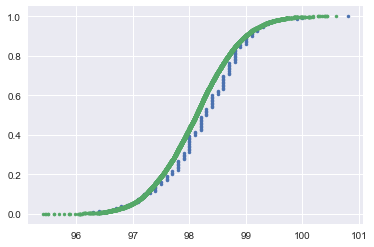

98.1046153846154
98.1123841582


In [48]:
df_males = df[df['gender'] == 'M']

temp_males = df_males['temperature']

df_females = df[df['gender'] == 'F']
temp_females = df_females['temperature']

mean = np.mean(temp_males)
std = np.std(temp_males)
samples = np.random.normal(mean, std, size=10000)
x_samp, y_samp = ecdf(samples)

_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.plot(x_samp, y_samp, marker='.', linestyle='none')

plt.show()

print(mean)
sample_mean = np.mean(samples)
print(sample_mean)

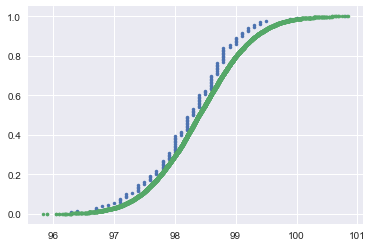

98.39384615384613
98.3979956086


In [49]:
mean = np.mean(temp_females)
std = np.std(temp_females)
samples = np.random.normal(mean, std, size=10000)
x_samp, y_samp = ecdf(samples)

_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.plot(x_samp, y_samp, marker='.', linestyle='none')

plt.show()

print(mean)
sample_mean = np.mean(samples)
print(sample_mean)

In [50]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


mean_diff = np.mean(temp_females) - np.mean(temp_males)

bs_replicates_males = draw_bs_reps(temp_males, np.mean, 10000)
bs_replicates_females = draw_bs_reps(temp_females, np.mean, 10000)

bs_diff_replicates = bs_replicates_females - bs_replicates_males

conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

print('difference of means =', mean_diff, 'F')
print('95% confidence interval =', conf_int, 'F')

difference of means = 0.289230769230727 F
95% confidence interval = [ 0.04615385  0.53384615] F


In [51]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((temp_males, temp_females)))

# Shift the samples
temp_males_shifted = temp_males - np.mean(temp_males) + combined_mean
temp_females_shifted = temp_females - np.mean(temp_females) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_males = draw_bs_reps(temp_males_shifted, np.mean, 10000)
bs_replicates_females = draw_bs_reps(temp_females_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_females - bs_replicates_males

# Compute the p-value: p
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0111


Is there a significant difference between males and females in normal temperature?
The cell above shows the mean difference between female and male body temperatures, a difference of 0.28923F.
The t-test validates that although the difference is not so significant, the hypothesis is true that females have a higher body temperature. 
Therefore, the difference between female and male temperatures is significant. 

What test did you use and why?

The samples distribution is not following the data distribution very well. The conditions needed for a Z statistic to be completed are not met.
Consequently, I wouldn't trust the Z statistic technique, and would prefer to utilize the T statistic to test the hypothesis that females have higher body temperature, after calculating the difference and confidence interval.

I feel that a linear regression should be used to find the optimal parameter for the male and female data sets but am not clear how it works.





Write a story with your conclusion in the context of the original problem.

I have analyzed a dataset of human body temperatures, with the temperature differences between males and females in mind.
Originally I expected that males would have a higher temperature, but in fact it is the women who have higher mean body temperatures.
The mean of the females is 98.39F while that of the males is 98.1F.